## Further investigations on the CIFAR-10 dataset

Our final model reached $~85\%$ accuracy on the CIFAR-10 dataset with the following tricks:

- Sequential network architecture similar to VGG  (repeated Conv2D + Conv2D + MaxPooling2D blocks)
- using Dropout layers
- using BatchNormalization layers
- using ImageDataGenerator modifications

In [1]:
import tensorflow as tf
tf.config.set_visible_devices([], "GPU")

## One-hot encoding of the labels and scaling of the features

In [4]:
from keras.regularizers import L2
from keras.optimizers import SGD, Adam, RMSprop, AdamW
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Activation, AveragePooling2D, Conv2D, MaxPooling2D, Flatten, Reshape, Dropout, BatchNormalization
from keras.utils import to_categorical, plot_model, set_random_seed

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

X_train = X_train / 255
X_test = X_test / 255

y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

print(X_train.shape, X_test.shape, y_train_encoded.shape, y_test_encoded.shape)


(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 10) (10000, 10)


## Batch normalization applied after Activation

In [5]:
checkpoint = ModelCheckpoint("best_model.keras", monitor="val_loss", mode="min", verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor="val_loss", patience=5, verbose=1, mode="min")

model = Sequential()

model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))


model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(10, activation="softmax"))

model.summary()

model.compile(loss="categorical_crossentropy",
              metrics=["accuracy"],
              optimizer=Adam()
              )

train = model.fit(X_train, y_train_encoded, 
         epochs=1,
         callbacks=[early_stop, checkpoint],
         batch_size=32,
         validation_split=0.1)

model.evaluate(X_test, y_test_encoded)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           51

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3858 - loss: 1.7756
Epoch 1: val_loss improved from inf to 1.15786, saving model to best_model.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 37ms/step - accuracy: 0.3859 - loss: 1.7754 - val_accuracy: 0.5850 - val_loss: 1.1579
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5909 - loss: 1.1581


[1.1692790985107422, 0.5863999724388123]

## Batch normalization applied before Activation - recommended order of layers

In [9]:

checkpoint = ModelCheckpoint("best_model.keras", monitor="val_loss", mode="min", verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor="val_loss", patience=5, verbose=1, mode="min", restore_best_weights=True)

model = Sequential()

model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation(activation="relu"))

model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation(activation="relu"))

model.add(MaxPooling2D(2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation(activation="relu"))

model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation(activation="relu"))

model.add(MaxPooling2D(2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation(activation="relu"))

model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation(activation="relu"))

model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation(activation="relu"))

model.add(Dense(10, activation="softmax"))

model.summary()

model.compile(loss="categorical_crossentropy",
              metrics=["accuracy"],
              optimizer=Adam()
              )

train = model.fit(X_train, y_train_encoded, 
         epochs=1,
         callbacks=[early_stop, checkpoint],
         batch_size=32,
         validation_split=0.1)

model.evaluate(X_test, y_test_encoded)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4037 - loss: 1.6511
Epoch 1: val_loss improved from inf to 1.35217, saving model to best_model.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 63s 44ms/step - accuracy: 0.4038 - loss: 1.6509 - val_accuracy: 0.5124 - val_loss: 1.3522
Restoring model weights from the end of the best epoch: 1.
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5153 - loss: 1.3802


[1.3761357069015503, 0.512499988079071]

## Residual networks

[K. He, X. Zhang, S. Ren, J. Sun - Deep Residual Learning for Image Recognition - 2015](https://arxiv.org/abs/1512.03385)

The main idea of residual networks is to use shortcuts to improve the training accuracy.
In a general model there is no guarantee that stacking new layers can even increase the training accuracy. By adding skip connections, we can ensure some kind of motononity using identity mappings. Without these, even an $F(x)=x$ identity function is hard to approximate with more layers.

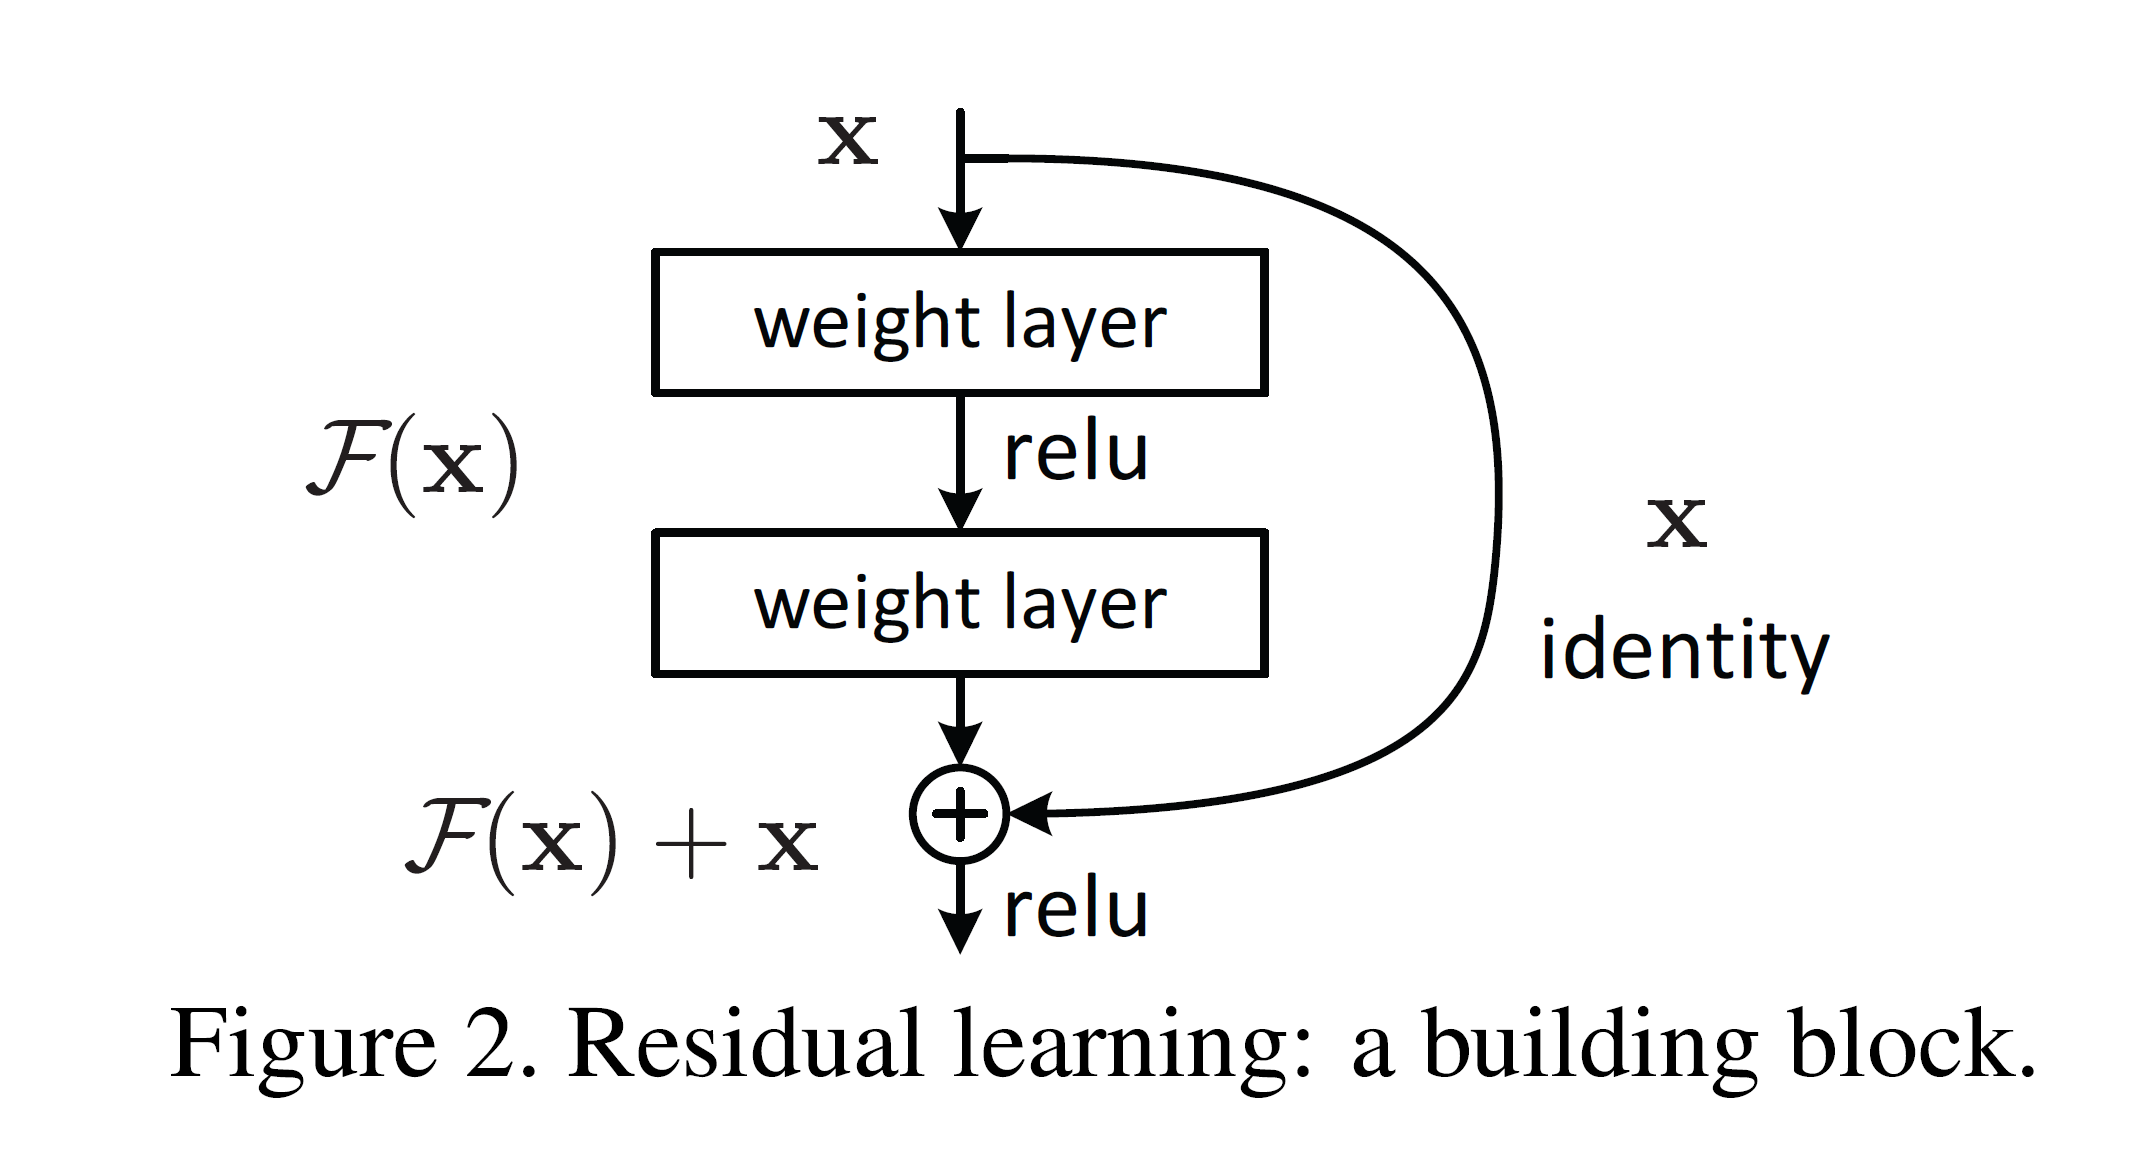

In [4]:
from IPython.display import Image
Image("resblock.png")
# Source: K. He, X. Zhang, S. Ren, J. Sun - Deep Residual Learning for Image Recognition - 2015
# https://arxiv.org/abs/1512.03385

## Functional model building in Keras

Let's build our VGG-style model with Functional model building in Keras

In [10]:
from keras.models import Model





In [3]:
def resnet_regular_block(act_in):
    # shapes do not change during this block

    return act_out

def resnet_halving_block(act_in):
    # shapes are halved during this block

    return act_out

## Apply more regularization on the Convolutional layers with L2 kernel regularizers and use special weight initialization

## We can apply some extra Data augmentation with ImageDataGenerator and add EarlyStopping and ModelCheckpoint callbacks


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint



In [8]:
def plot_train(train):
    plt.plot(train.history['loss'], 'r-', label='train')
    plt.plot(train.history['val_loss'], 'b-', label='validation')
    plt.title("Log loss")
    plt.legend()
    plt.show()
    plt.plot(train.history['accuracy'], 'r-', label='train')
    plt.plot(train.history['val_accuracy'], 'b-', label='validation')
    plt.title("Accuracy")
    plt.legend()
    plt.show()    

## Learning Rate Scheduling

We can create a function that tells the optimizer to drop the learning rate at certain points in the training.

In [7]:
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau




## Per-pixel mean centralization

## Let's use the best model and continue training with a smaller learning rate